In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv', encoding='utf-8', encoding_errors='ignore')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4874,ham,I know dat feelin had it with Pete! Wuld get w...,NaN,NaN,NaN
4423,ham,Update your face book status frequently :),NaN,NaN,NaN
5189,spam,ree entry in 2 a weekly comp for a chance to w...,NaN,NaN,NaN
562,ham,Geeeee ... I love you so much I can barely sta...,NaN,NaN,NaN
284,ham,Yeah I think my usual guy's still passed out f...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Steps
 
 * Data cleaning
 * EDA
 * Text preprocessing
 * Model building
 * Evaluation
 * Improvement
 * Website
 * Deploy 


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Removing empty columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.sample(5)

,v1,v2
1413,spam,Dear U've been invited to XCHAT. This is our f...
1449,ham,say thanks2.
2802,spam,FreeMsg>FAV XMAS TONES!Reply REAL
886,ham,I like to talk pa but am not able to. I dont k...
5519,ham,Can you pls send me that company name. In saib...


In [8]:
# Renaming the columns
df.rename(columns={"v1": "target", "v2": "text"}, inplace=True)
df.sample(5)

,target,text
5295,ham,Alex says he's not ok with you not being ok wi...
4932,ham,Once free call me sir.
2950,ham,Hey now am free you can call me.
4745,ham,Orh i tot u say she now still dun believe.
3836,ham,Early bird! Any purchases yet?


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df.target = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Checking if there's any missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# Checking for duplicates
df.duplicated().sum()

np.int64(404)

In [14]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(5168, 2)

# 2. EDA

In [16]:
df['target'].value_counts()

target
0    4516
1     652
Name: count, dtype: int64

Text(0.5, 1.0, 'Piechart representing percentage of ham and spam messages')

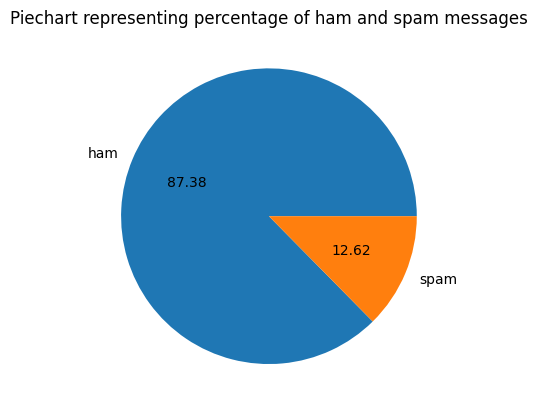

In [31]:
plt.pie(df['target'].value_counts(), labels=["ham", "spam"], autopct="%0.2f")
plt.title("Piechart representing percentage of ham and spam messages")

In [18]:
import nltk

In [19]:
nltk.download('punkt_tab')

[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [20]:
df['char_len'] = df['text'].apply(len)

In [21]:
df.head()

,target,text,char_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# num of words
df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5168, dtype: int64

In [23]:
# from nltk.tokenize import word_tokenize
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,char_len,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['char_len', 'num_words', 'num_sentences']].describe()

,char_len,num_words,num_sentences
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# For Ham messages.
df[df['target'] == 0][['char_len', 'num_words', 'num_sentences']].describe()

,char_len,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.108946,1.819973
std,56.328803,13.494730,1.383228
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# For Spam messages.
df[df['target'] == 1][['char_len', 'num_words', 'num_sentences']].describe()

,char_len,num_words,num_sentences
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.980061
std,29.937352,7.015283,1.491780
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


<Axes: xlabel='char_len', ylabel='Count'>

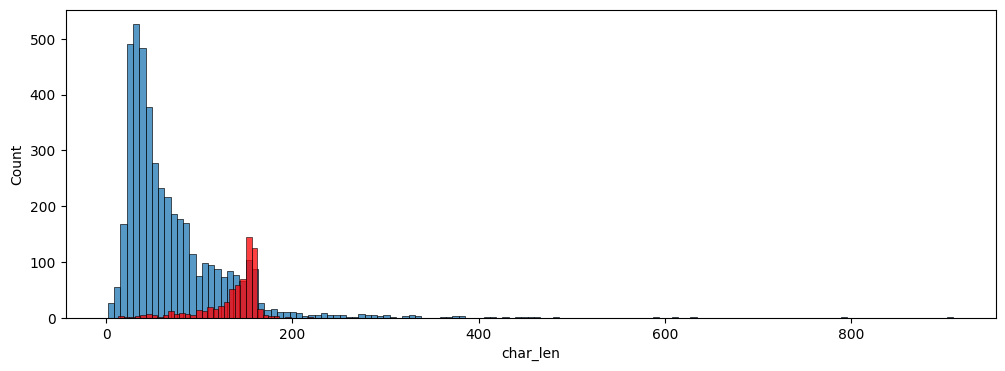

In [35]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['target'] == 0]['char_len'])
sns.histplot(df[df['target'] == 1]['char_len'], color='red')

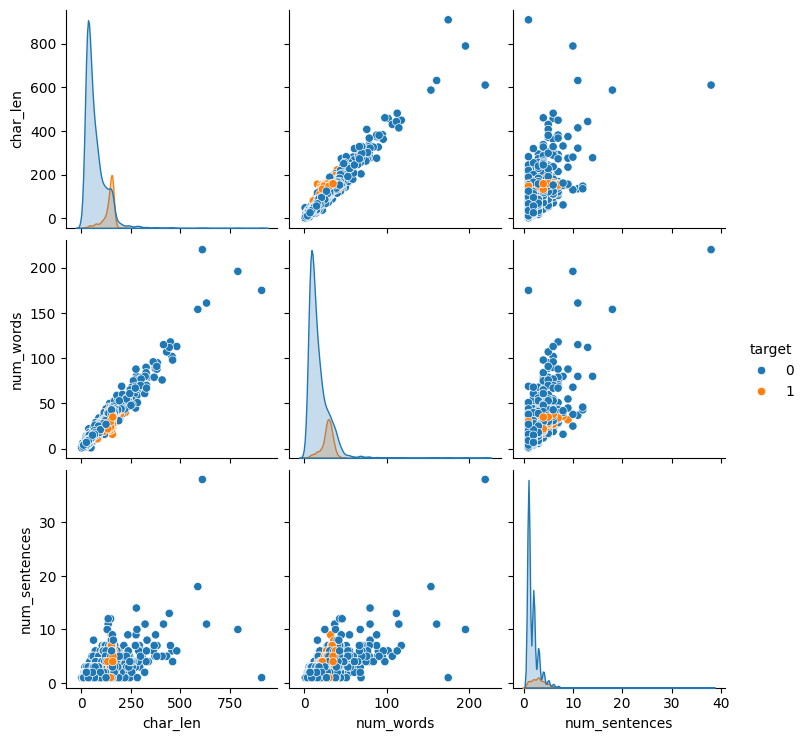

In [40]:
sns.pairplot(df, hue='target')

<Axes: >

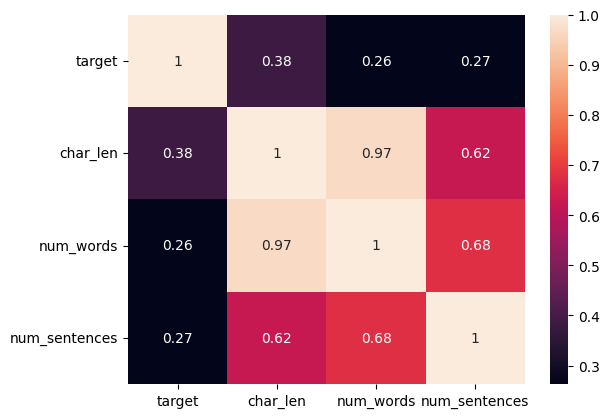

In [42]:
sns.heatmap(df[['target', 'char_len', 'num_words', 'num_sentences']].corr(), annot=True)

Here we can multi-collinearity among the features. So we can keep only one column since "char_len" has high correlation with the target. We only keep that column

# 3. Data Preprocessing

* Lowercase
* Tokenization (Splitting text into words also called as tokens)
* Removing special characters ()
* Removing stop words and punctuation (stop words = the words used in sentence formation but has no contribution in sentence's meaning, Eg: Helping verbs, articles, prepositions etc)
* stemming (Or Lemmatization = reducing the words into their root/base forms)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ettes\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [46]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [47]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Thinking')

'think'

In [59]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:] # Clone the list or else text = y will be pointing to the reference, so by deleting y text also gets deleted.
    y.clear()

    for i in text:
        if i not in stopwords.words('English') and i  not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [62]:
transform_text("I know you always wanted to become a scientist inventor Mr. Shanz.")

'know alway want becom scientist inventor shanz'

In [64]:
df['transformed_text'] = df['text'].apply(transform_text)

In [65]:
df.head()

,target,text,char_len,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [79]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [81]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))

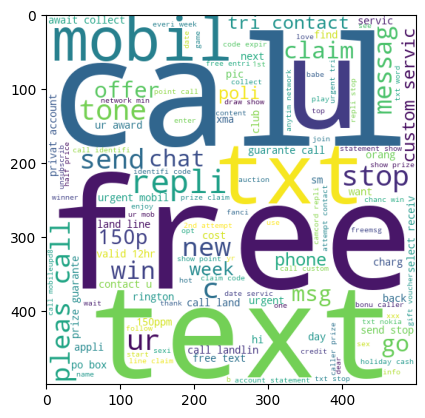

In [82]:
plt.imshow(spam_wc)

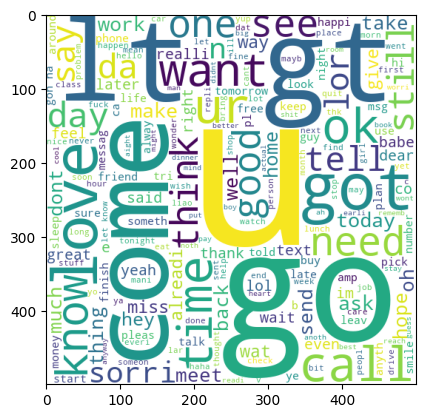

In [83]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = " "))
plt.imshow(ham_wc)

In [85]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [86]:
len(spam_corpus)

10106

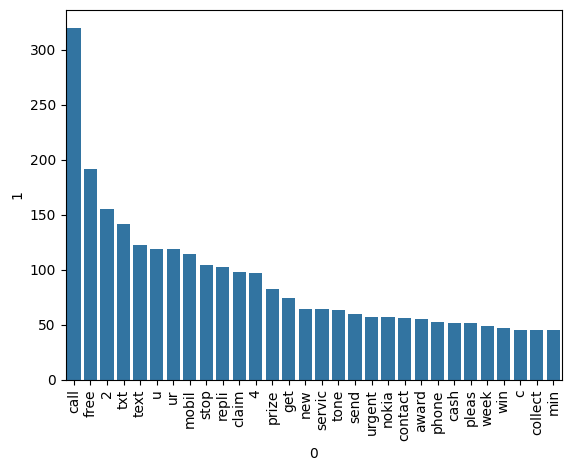

In [104]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [107]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [108]:
len(ham_corpus)

35380

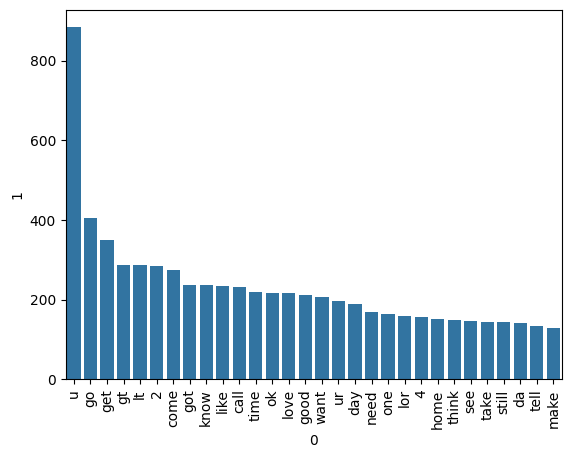

In [109]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# 4. Model building

In [296]:
# Vectorization
# BoW / TF-IDF/ Word2vec

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [297]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [298]:
X.shape

(5168, 3000)

In [299]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler() # We can't use standard scalar as it also invludes -ves, and NB can't handle
# X = scaler.fit_transform(X)

In [300]:
# X = np.hstack((X, df['char_len'].values.reshape(-1, 1)))

In [301]:
y = df['target'].values

In [302]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5168,))

In [303]:
from sklearn.model_selection import train_test_split

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [305]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [306]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [307]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))

0.8723404255319149
0.49130434782608695
[[789 117]
 [ 15 113]]


In [308]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))

0.9787234042553191
0.9907407407407407
[[905   1]
 [ 21 107]]


In [309]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))

0.9787234042553191
0.9649122807017544
[[902   4]
 [ 18 110]]


In [310]:
# tfidf + mnb

In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [312]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=13)
abc = AdaBoostClassifier(n_estimators=50, random_state=13)
bc = BaggingClassifier(n_estimators=50, random_state=13)
etc = ExtraTreesClassifier(n_estimators=50, random_state=13)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=13)

In [313]:
clfs = {
    'SVC': svc,
    'LR': lrc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt
}

In [314]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [253]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For ", name)
    print("Accuarcy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuarcy:  0.9690522243713733
Precision:  0.9137931034482759
For  LR
Accuarcy:  0.9690522243713733
Precision:  0.9615384615384616
For  KN
Accuarcy:  0.913926499032882
Precision:  1.0
For  NB
Accuarcy:  0.988394584139265
Precision:  0.9833333333333333
For  DT
Accuarcy:  0.9468085106382979
Precision:  0.8762886597938144
For  RF
Accuarcy:  0.97678916827853
Precision:  0.9905660377358491
For  AdaBoost
Accuarcy:  0.9323017408123792
Precision:  0.881578947368421
For  BgC
Accuarcy:  0.9632495164410058
Precision:  0.8688524590163934
For  ETC
Accuarcy:  0.9825918762088974
Precision:  0.9661016949152542
For  GBDT
Accuarcy:  0.960348162475822
Precision:  0.967741935483871


In [215]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores})


In [216]:
performance_df.sort_values(by='Precision', ascending=False)

,Algorithm,Accuracy,Precision
3,NB,0.969052,1.000000
2,KN,0.907157,1.000000
5,RF,0.976789,0.990566
8,ETC,0.977756,0.972973
0,SVC,0.979691,0.957265
9,GBDT,0.958414,0.956989
1,LR,0.954545,0.926316
6,AdaBoost,0.935203,0.896104
4,DT,0.945841,0.875000
7,BgC,0.960348,0.865546


In [234]:
# Model improvement
# By changing tfidf hyperparameter max_features
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_mx_ft_3k': accuracy_scores, 'Precision_mx_ft_3k': precision_scores})
performance_df.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_mx_ft_3k,Precision_mx_ft_3k
0,SVC,0.979691,0.957265,0.983559,0.958678
1,LR,0.954545,0.926316,0.959381,0.947917
2,KN,0.907157,1.000000,0.914894,1.000000
3,NB,0.969052,1.000000,0.978723,0.990741
4,DT,0.945841,0.875000,0.947776,0.877551
5,RF,0.976789,0.990566,0.976789,0.990566
6,AdaBoost,0.935203,0.896104,0.932302,0.881579
7,BgC,0.960348,0.865546,0.963250,0.868852
8,ETC,0.977756,0.972973,0.982592,0.966102
9,GBDT,0.958414,0.956989,0.960348,0.967742


In [254]:
new_temp = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_scaled': accuracy_scores, 'Precision_scaled': precision_scores})

In [261]:
new_df = performance_df.merge(temp_df, on="Algorithm")
new_df = new_df.merge(new_temp, on='Algorithm')

In [262]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_mx_ft_3k,Precision_mx_ft_3k,Accuracy_scaled,Precision_scaled
0,SVC,0.979691,0.957265,0.983559,0.958678,0.969052,0.913793
1,LR,0.954545,0.926316,0.959381,0.947917,0.969052,0.961538
2,KN,0.907157,1.000000,0.914894,1.000000,0.913926,1.000000
3,NB,0.969052,1.000000,0.978723,0.990741,0.988395,0.983333
4,DT,0.945841,0.875000,0.947776,0.877551,0.946809,0.876289
5,RF,0.976789,0.990566,0.976789,0.990566,0.976789,0.990566
6,AdaBoost,0.935203,0.896104,0.932302,0.881579,0.932302,0.881579
7,BgC,0.960348,0.865546,0.963250,0.868852,0.963250,0.868852
8,ETC,0.977756,0.972973,0.982592,0.966102,0.982592,0.966102
9,GBDT,0.958414,0.956989,0.960348,0.967742,0.960348,0.967742


In [284]:
new_df.sort_values(by='Accuracy', ascending=False)

,Algorithm,Accuracy,Precision,Accuracy_mx_ft_3k,Precision_mx_ft_3k,Accuracy_scaled,Precision_scaled
0,SVC,0.979691,0.957265,0.983559,0.958678,0.969052,0.913793
8,ETC,0.977756,0.972973,0.982592,0.966102,0.982592,0.966102
5,RF,0.976789,0.990566,0.976789,0.990566,0.976789,0.990566
3,NB,0.969052,1.000000,0.978723,0.990741,0.988395,0.983333
7,BgC,0.960348,0.865546,0.963250,0.868852,0.963250,0.868852
9,GBDT,0.958414,0.956989,0.960348,0.967742,0.960348,0.967742
1,LR,0.954545,0.926316,0.959381,0.947917,0.969052,0.961538
4,DT,0.945841,0.875000,0.947776,0.877551,0.946809,0.876289
6,AdaBoost,0.935203,0.896104,0.932302,0.881579,0.932302,0.881579
2,KN,0.907157,1.000000,0.914894,1.000000,0.913926,1.000000


In [315]:
# Voting classifier
svc = SVC(kernel='sigmoid', gamma=1.0)
etc = ExtraTreesClassifier(n_estimators=50, random_state=13)
rfc = RandomForestClassifier(n_estimators=50, random_state=13)
mnb = MultinomialNB()

from sklearn.ensemble import VotingClassifier

In [321]:
voting = VotingClassifier(estimators=[('etc', etc), ('rfc', rfc), ('mnb', mnb)])

In [322]:
voting.fit(X_train, y_train)

,estimators,"[('etc', ...), ('rfc', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [323]:
y_pred = voting.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred), "\nPrecision:", precision_score(y_test, y_pred))

Accuracy:  0.9835589941972921 
Precision: 0.9911504424778761


In [324]:
from sklearn.ensemble import StackingClassifier

In [326]:
# Stacking
estimators = [('etc', etc), ('rfc', rfc), ('mnb', mnb)]
final_estimator = RandomForestClassifier()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [327]:
clf.fit(X_train, y_train)

,estimators,"[('etc', ...), ('rfc', ...), ...]"
,final_estimator,RandomForestClassifier()
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [328]:
y_preds = clf.predict(X_test)

In [329]:
print("Accuracy: ", accuracy_score(y_test, y_pred), "\nPrecision:", precision_score(y_test, y_pred))

Accuracy:  0.9835589941972921 
Precision: 0.9911504424778761


In [330]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(voting, open('model.pkl', 'wb'))

In [ ]:
# pickle.dump(transform_text, open("transform_text.pkl", 'wb'))